# FIT1043
## Assignment 2
Name: Chee Cheng Mun

Student Id: 34280332
### Part A: Classification
#### A1. Supervised Learning
A1.1

Supervised Machine Learning (ML) studies the relationship between input and output data. 
It is a type of Machine Learning that uses the labelled dataset in order to train a model that recognize patterns and predict outcomes. 
In Supervised ML, inputs are usually known as features or X variable, while output is usually known as target or Y variable.
Example of Supervised ML is image and speech recognition.
 
Labelled data is data containing both the target and features. It is used to train computer models in Supervised ML. Input data is labelled with the expected output data. This process aims to discover a mapping function that maps an input variable onto an output variabled.

Train dataset is a large set of data used to train the algorithm. It includes inputs and correct outputs which allows the model to perform comparison between them. The algorithm then measures its accuracy. Errors found will be further adjusted by the algorithm so that a more accurate model can be computed.

Test dataset is a set of data used to evaluate the accuracy of the model. It is a part of the train dataset that has not been used during the model training, which means test and train datasets are never overlapped since they are both needed for different purpose. By evaluating the accuracy of the model, the algorithm can be further trained and adjusted to achive better results.

A1.2

In [428]:
import pandas as pd
#importing modules

In [429]:
df = pd.read_csv("FIT1043-MusicGenre-Dataset.csv")

Features(instance_id - valence)

In [430]:
x = df.iloc[:, 0:14]

Label(music_genre)

In [431]:
y = df.iloc[:, 14]

Check if the dataframe is separated as expectation

In [432]:
x.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960


In [433]:
y.head()

0    1
1    1
2    9
3    9
4    5
Name: music_genre, dtype: int64

A1.3

In [434]:
from sklearn.model_selection import train_test_split
#importing modules

In [435]:
#splitting the data into train and test dataset for features and label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

Checking the shape of the train and test set for features

In [436]:
x_train.shape

(19468, 14)

In [437]:
x_test.shape

(6490, 14)

Checking the shape of the train and test set for label

In [438]:
y_train.shape

(19468,)

In [439]:
y_test.shape

(6490,)

#### A2. Classification (training)
A2.1

Binary Classification is classification tasks that only have a binary outcome, where the result would be positive or negative. Example is medical test, where the result would either be the patient having the disease or the not having the disease.

Multiclass classification is classification tasks that have multiple(more than two) outcomes, each entity is assigned to their own class thus avoiding overlaps.
Example is identification of fruits, where the result would be the name of the fruit(apple, banana, orange, watermelon). 

A2.2.a

Scaling/Data Normalization is used to adjust the scale of the features such that they have a similar scale during the instances when the range of values of raw data varies widely.

For example, if there is such a dataset where there are feature of adult's height and feature of child's height at the same time, the difference in range between the two feature is huge. If the dataset is used directly as it is, the algorithm will prioritise the larger scaled feature(adult's height), causing disproportion to happen. As such, the accuracy of the algorithm will be greatly reduced.

Thus, we perform normalization such that every feature contributes proportionately to the final result. In this way, the case of larger scaled feature dominating the algorithm's learning process can be avoided. In short, scaling/normalization ensures accurate learning process for the algorithm.

A2.2.b

In [440]:
from sklearn.preprocessing import StandardScaler
#importing modules

In [441]:
#Create object of standard scaler to use its method
sc = StandardScaler()

Since instance id, artist name and track name shouldn't be normalized, reassign the variable x(excluding the three unneccesary columns), then only perform normalization.

In [442]:
x = df.iloc[:, 3:14]

In [443]:
#performing check on the reassigned x
x.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560
1,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331
2,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690
3,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200
4,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960


In [444]:
#reassign the train and test dataset for features and label as well
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [445]:
#perform checks on the reassigned training set and test set for features
x_train.shape

(19468, 11)

In [446]:
x_test.shape

(6490, 11)

In [447]:
#perform normalization
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Check if the data are normalized correctly

In [448]:
print(x_train)

[[-0.588578   -0.17533468  0.01574302 ... -0.28522623  0.88688251
  -0.55851219]
 [-0.07328813 -0.44755805  0.36957345 ... -0.37480624  0.29215692
   0.59624165]
 [-0.00887689 -0.83628132  0.81888194 ...  0.22109555 -0.00399629
   0.25304558]
 ...
 [-0.65298923  1.84438712 -2.33189383 ... -0.4049908  -1.42572129
  -1.45566709]
 [ 0.63523544 -0.89790332 -0.44479818 ...  0.04680402 -0.8574432
   0.19248156]
 [ 0.31317928 -0.38608825 -0.15836402 ...  2.44112182  1.63908354
   1.351273  ]]


In [449]:
print(x_test)

[[ 0.24876804 -0.89221883 -0.72561598 ... -0.0641973   0.64905112
  -0.22742892]
 [ 0.44200174 -0.79003261  0.88066186 ...  0.06530423  1.52243991
   1.60967945]
 [-0.65298923  0.42180046 -1.3377988  ... -0.52572907  2.02206563
  -0.37278255]
 ...
 [-1.3615128  -0.55586197 -0.35493648 ... -0.26575231  1.6972092
   0.94347532]
 [-0.45975553  1.64534207 -0.41110004 ...  0.09451511  0.50890223
  -0.44142176]
 [-0.52416676  1.13894806  0.77395109 ... -0.11580317 -0.58319337
  -0.53832418]]


A2.3.a

Support Vector Machine(SVM) is a machine learning algorithm.
It uses a set of supervised learning methods to solve classification, regression and outliers detection.
It supports binary classification and separating data points into two classes.
For multiclass classification, it breaks down the problem into multiple binary classification problem instead.
To solve binary classification, it uses hyperplane, a decision boundary that differentiates the two classes, where distance between each class is maximized.

A2.3.b

In Support Vector Machine (SVM), a kernel is a function that computes the similarity between pairs of data points in a higher-dimensional space. 
It is also known as kernel function. Generally, it transforms the train dataset so that a non-linear decision surface is able to transform to a linear equation in higher number of dimension spaces.
It allows SVM to efficiently solve non-linear classifications by mapping the input features into a higher-dimensional space where a linear decision boundary can be found.

A2.3.c

In [450]:
from sklearn import svm
from sklearn.metrics import accuracy_score
#importing modules

In [451]:
#create a svm model and fit x train and y train into it
svm_model = svm.SVC(C=1.0)
svm_model.fit(x_train, y_train)

SVC()

A2.4
(Using Random Forest Algorithm)

In [452]:
#create a random forest model and fit x train and y train into it
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)

In [453]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

#### A3. Classification (prediction)
A3.1

In [454]:
#prediction of the svm model
y_pred = svm_model.predict(x_test)

In [455]:
#prediction of the random forest model
y_pred_rf = classifier.predict(x_test)

In [456]:
#accuracy of svm model
accuracy = accuracy_score(y_test, y_pred)

In [457]:
#accuracy of random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [458]:
#displaying the accuracy of both models
print("Accuracy of SVM model: " + str(float(accuracy*100)) + "%")
print("Accuracy of Random Forest model: " + str(float(accuracy_rf*100)) + "%")

Accuracy of SVM model: 56.45608628659476%
Accuracy of Random Forest model: 52.58859784283513%


A3.2

In [459]:
from sklearn.metrics import confusion_matrix 
#importing modules

In [460]:
#confusion matrix of the svm model
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

[[225   2   9   1 122  39  75  36  18 131]
 [ 18 468  46  48  16  30   0   9   0   4]
 [ 30  80 342  10  83  37   1  67   0  27]
 [ 18  22  19 565   3   9   0  27   0   6]
 [ 40   8  35   1 369  14  17  45   7 102]
 [ 44  28  30   8  39 367  21  67   4  23]
 [ 29   0   1   0   9   4 362   3 186  45]
 [ 24  13  85  51  44  95  24 313   4  22]
 [ 28   0   0   0   9   1 311   6 192  85]
 [ 65   0   2   2  30   4  24  12  32 461]]


In [461]:
#confusion matrix of the random forest model
cm = confusion_matrix(y_test, y_pred_rf) 
print(cm)

[[219   7  24   0  99  42  52  38  30 147]
 [ 14 488  41  44  14  24   0   8   1   5]
 [ 46  87 340  10  64  37   1  67   2  23]
 [ 17  32  14 557   4  12   0  24   0   9]
 [ 50  11  41   1 361   8  10  39  12 105]
 [ 43  32  66   7  26 335  11  79   8  24]
 [ 28   0   0   0   5   6 273   8 284  35]
 [ 37  11 112  51  35  89  10 284   9  37]
 [ 31   1   1   0  11   5 328   5 190  60]
 [101   2   8   3  59   8  26  14  45 366]]


A3.3

I will be using accuracy and Mean Squared Error(MSE) as the comparison standard.
MSE measures the average of the squares of the errors, which means the lower the MSE, the better the model performs.
Accuracy measures how often the outcome is correctly predicted, the higher the accuracy, the better the model performs.

In [462]:
from sklearn.metrics import mean_squared_error
mse_svm = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE of SVM model: " + str(mse_svm))
print("MSE of Random Forest model: " + str(mse_rf))

MSE of SVM model: 7.649306625577812
MSE of Random Forest model: 8.841140215716488


In [463]:
print("Accuracy of SVM model: " + str(accuracy*100) + "%")
print("Accuracy of Random Forest model: " + str(accuracy_rf*100) + "%")

Accuracy of SVM model: 56.45608628659476%
Accuracy of Random Forest model: 52.58859784283513%


As shown above, the SVM model has a lower SVM and a higher accuracy than the Random Forest Model.
Therefore, the SVM model performed better.

#### A4. Independent evaluation
A4.1

In [464]:
#read the file and perform checking
submission = pd.read_csv("FIT1043-MusicGenre-Submission.csv")
submission.shape

(6490, 14)

Only common columns of submission and X should be kept.

In [465]:
#cleaned-up data
f_submission = submission[x.columns.intersection(submission.columns)]

In [466]:
f_submission.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27,0.06240,0.436,218227,0.663,0.001510,0.0759,-5.897,0.0510,117.956,0.360
1,62,0.03470,0.582,195733,0.778,0.000000,0.2100,-3.776,0.1780,82.193,0.205
2,35,0.69200,0.269,324480,0.331,0.000000,0.0851,-9.253,0.0338,139.338,0.250
3,47,0.68200,0.428,256267,0.454,0.000005,0.2160,-9.952,0.4940,173.272,0.573
4,48,0.00409,0.404,271173,0.599,0.000252,0.1130,-5.565,0.0289,136.045,0.195


In [467]:
#perform normalization and check if it is performed correctly
f_submission = sc.fit_transform(f_submission)
print(f_submission)

[[-1.12312535 -0.70039214 -0.69804162 ... -0.42166141 -0.05711513
  -0.38585539]
 [ 1.12099138 -0.78262092  0.12803911 ...  0.86104885 -1.22552078
  -1.01594565]
 [-0.61018438  1.16860566 -1.64294218 ... -0.5953828   0.64145182
  -0.83301622]
 ...
 [ 0.67216804 -0.46409572  0.61463461 ... -0.70648369 -0.51457161
   0.49627098]
 [ 0.28746231 -0.81200954  0.08277442 ... -0.35904091  0.82868814
  -0.83301622]
 [ 1.05687376 -0.86977749 -1.36003782 ... -0.53882235  2.06893688
   0.54505216]]


In [468]:
#prediction on the cleaned-up data
f_pred = svm_model.predict(f_submission)

A4.2

In [469]:
#create a new dataframe combining the instance id and predicted music genre
df_submission = pd.DataFrame({'instance_id': submission['instance_id'], 'music_genre': f_pred})
df_submission

,instance_id,music_genre
0,49290,2
1,81619,8
2,31979,2
3,35985,6
4,25426,0
...,...,...
6485,23196,8
6486,21415,6
6487,46657,9
6488,83211,0


In [470]:
#save the results as a .csv file
df_submission.to_csv('34280332_ChengMunChee-v1.csv', sep=',', index=False, encoding='utf-8')

### Part B : Selection of Dataset and perform Clustering
#### B1. Selection of a Dataset with missing data, Clustering
B1.1

The dataset chosen (travel-times.csv) is from the link: https://openmv.net/info/travel-times

In [471]:
data = pd.read_csv("travel-times.csv")
missing_data = data.isnull().sum()
#Making sure there is missing data in the dataframe
missing_data

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

Upon checking the file, the column Comments is just remark on some of the data, which means it can be removed without causing impact to other data.
Apart from that, the other column containing missing data is FuelEconomy. Since the file still have plenty of other columns that can be used for calculation and comparison, it can be safely removed as well.

In [472]:
data = data.drop(columns = ['FuelEconomy', 'Comments'])
data

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,36.8,34.8,No
...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,65.5,39.7,No
201,7/14/2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,40.1,32.1,Yes
202,7/13/2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,54.2,40.6,Yes
203,7/12/2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,51.9,36.5,Yes


B1.2

In [473]:
import numpy as np
from sklearn.cluster import KMeans

In [474]:
#These two numerical data are chosen in order to form a more concentrated scatter plot rather than a line scatter plot.
kmeans = KMeans(n_clusters=2).fit(data[['MaxSpeed', 'TotalTime']])
kmeans.cluster_centers_

C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[125.72432432,  52.08108108],
       [128.00297619,  39.66309524]])

B1.3

Visualisation of the cleaned-up data.

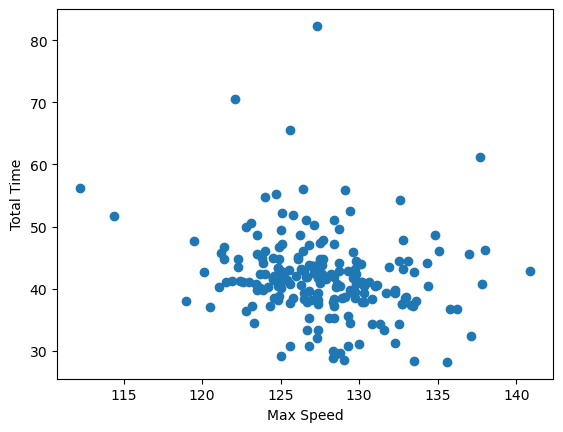

In [475]:
import matplotlib.pyplot as plt
plt.scatter(x=data['MaxSpeed'],y=data['TotalTime']) 
plt.xlabel('Max Speed')
plt.ylabel('Total Time')
plt.show()

Visualisation of the K-means Clustering

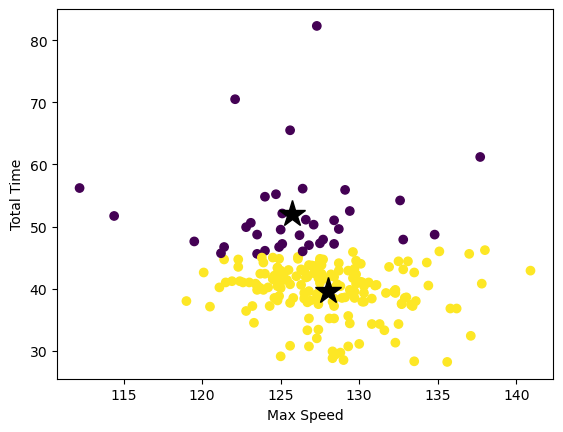

In [476]:
 plt.scatter(
    x=data['MaxSpeed'],
    y=data['TotalTime'],
    c=kmeans.labels_)
    
# Visualising the cluster centers
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
 )
plt.xlabel('Max Speed')
plt.ylabel('Total Time')
plt.show()

The data is separated into two clusters according to their Total Time in travelling.
The first cluster from the top(yellow) spend more time in travelling compared to the second cluster(purple).
The first cluster also have a more scattered relationship between the total time and max speed compared to the second cluster where the max speed is mostly concentrated in the range around 120 - 135.
The clusters are formed according to their similar pattern(total time spent and concentration of max speed).